In [1]:
import psycopg2
from psycopg2.extensions import connection

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [3]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [4]:
table = "social_network"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [5]:
# Create a dataframe

import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,compose_post_service_cpu,compose_post_service_memory,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_service_cpu,home_timeline_service_memory,jaeger_cpu,jaeger_memory,media_frontend_cpu,...,user_mongodb_memory,user_service_cpu,user_service_memory,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_service_cpu,user_timeline_service_memory,timestamp
0,1,0.009591,0.960938,1.918566,2.558594,0.001798,0.984375,0.463507,10.578125,0.224186,...,60.109375,0.016784,2.585938,7.178489,61.863281,1.997141,2.414062,0.022978,1.851562,1716784961
1,2,0.003147,0.960938,3.087653,2.558594,0.004895,0.984375,0.434022,10.605469,0.000000,...,60.109375,0.036164,2.585938,3.229164,61.863281,1.094170,2.414062,0.028372,1.851562,1716784971
2,3,0.005894,0.960938,1.169192,2.558594,0.003097,0.984375,0.240722,10.605469,0.000000,...,60.109375,0.079175,2.585938,3.979079,61.863281,1.419405,2.414062,0.028373,1.851562,1716784981
3,4,0.005897,0.960938,1.338135,2.558594,0.002599,0.984375,0.567347,10.570312,0.062617,...,60.109375,0.043027,2.585938,6.814757,62.511719,1.419991,2.414062,0.288296,2.113281,1716784991
4,5,8.219590,1.632812,2.843090,2.570312,1.389488,1.378906,1.996954,10.667969,0.062616,...,60.414062,0.998052,2.761719,8.115597,62.707031,2.075211,2.484375,1.863028,2.117188,1716785001


In [6]:
table = "social_network_predicted"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [7]:
# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,compose_post_service_cpu,compose_post_service_memory,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_service_cpu,home_timeline_service_memory,jaeger_cpu,jaeger_memory,media_frontend_cpu,...,user_mongodb_memory,user_service_cpu,user_service_memory,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_service_cpu,user_timeline_service_memory,timestamp
0,1,0.0,11.014030,0.0,1189.0123,0.0,5.190573,8.269668,417.48114,0.203069,...,120.91448,0.0,13.788195,64.585556,981.8291,0.0,203.80663,151.26628,97.225740,1716790893
1,2,0.0,11.082872,0.0,1190.7561,0.0,5.192694,10.030255,434.37894,0.199303,...,120.97562,0.0,13.779107,86.459270,976.8180,0.0,205.85954,145.82378,97.883865,1716790903
2,3,0.0,10.975060,0.0,1216.2971,0.0,5.134735,15.396371,481.78240,0.195751,...,120.91624,0.0,13.782152,129.898450,971.6934,0.0,208.01900,141.08601,98.003580,1716790913
3,4,0.0,10.845794,0.0,1229.5076,0.0,4.992311,18.243544,535.48840,0.193870,...,120.82347,0.0,13.810102,155.113170,972.2990,0.0,209.15251,139.48724,97.920050,1716790923
4,5,0.0,10.721334,0.0,1236.5613,0.0,4.871289,20.807343,572.33970,0.191405,...,120.75637,0.0,13.823888,166.320680,976.4177,0.0,209.79097,139.10013,97.916740,1716790933


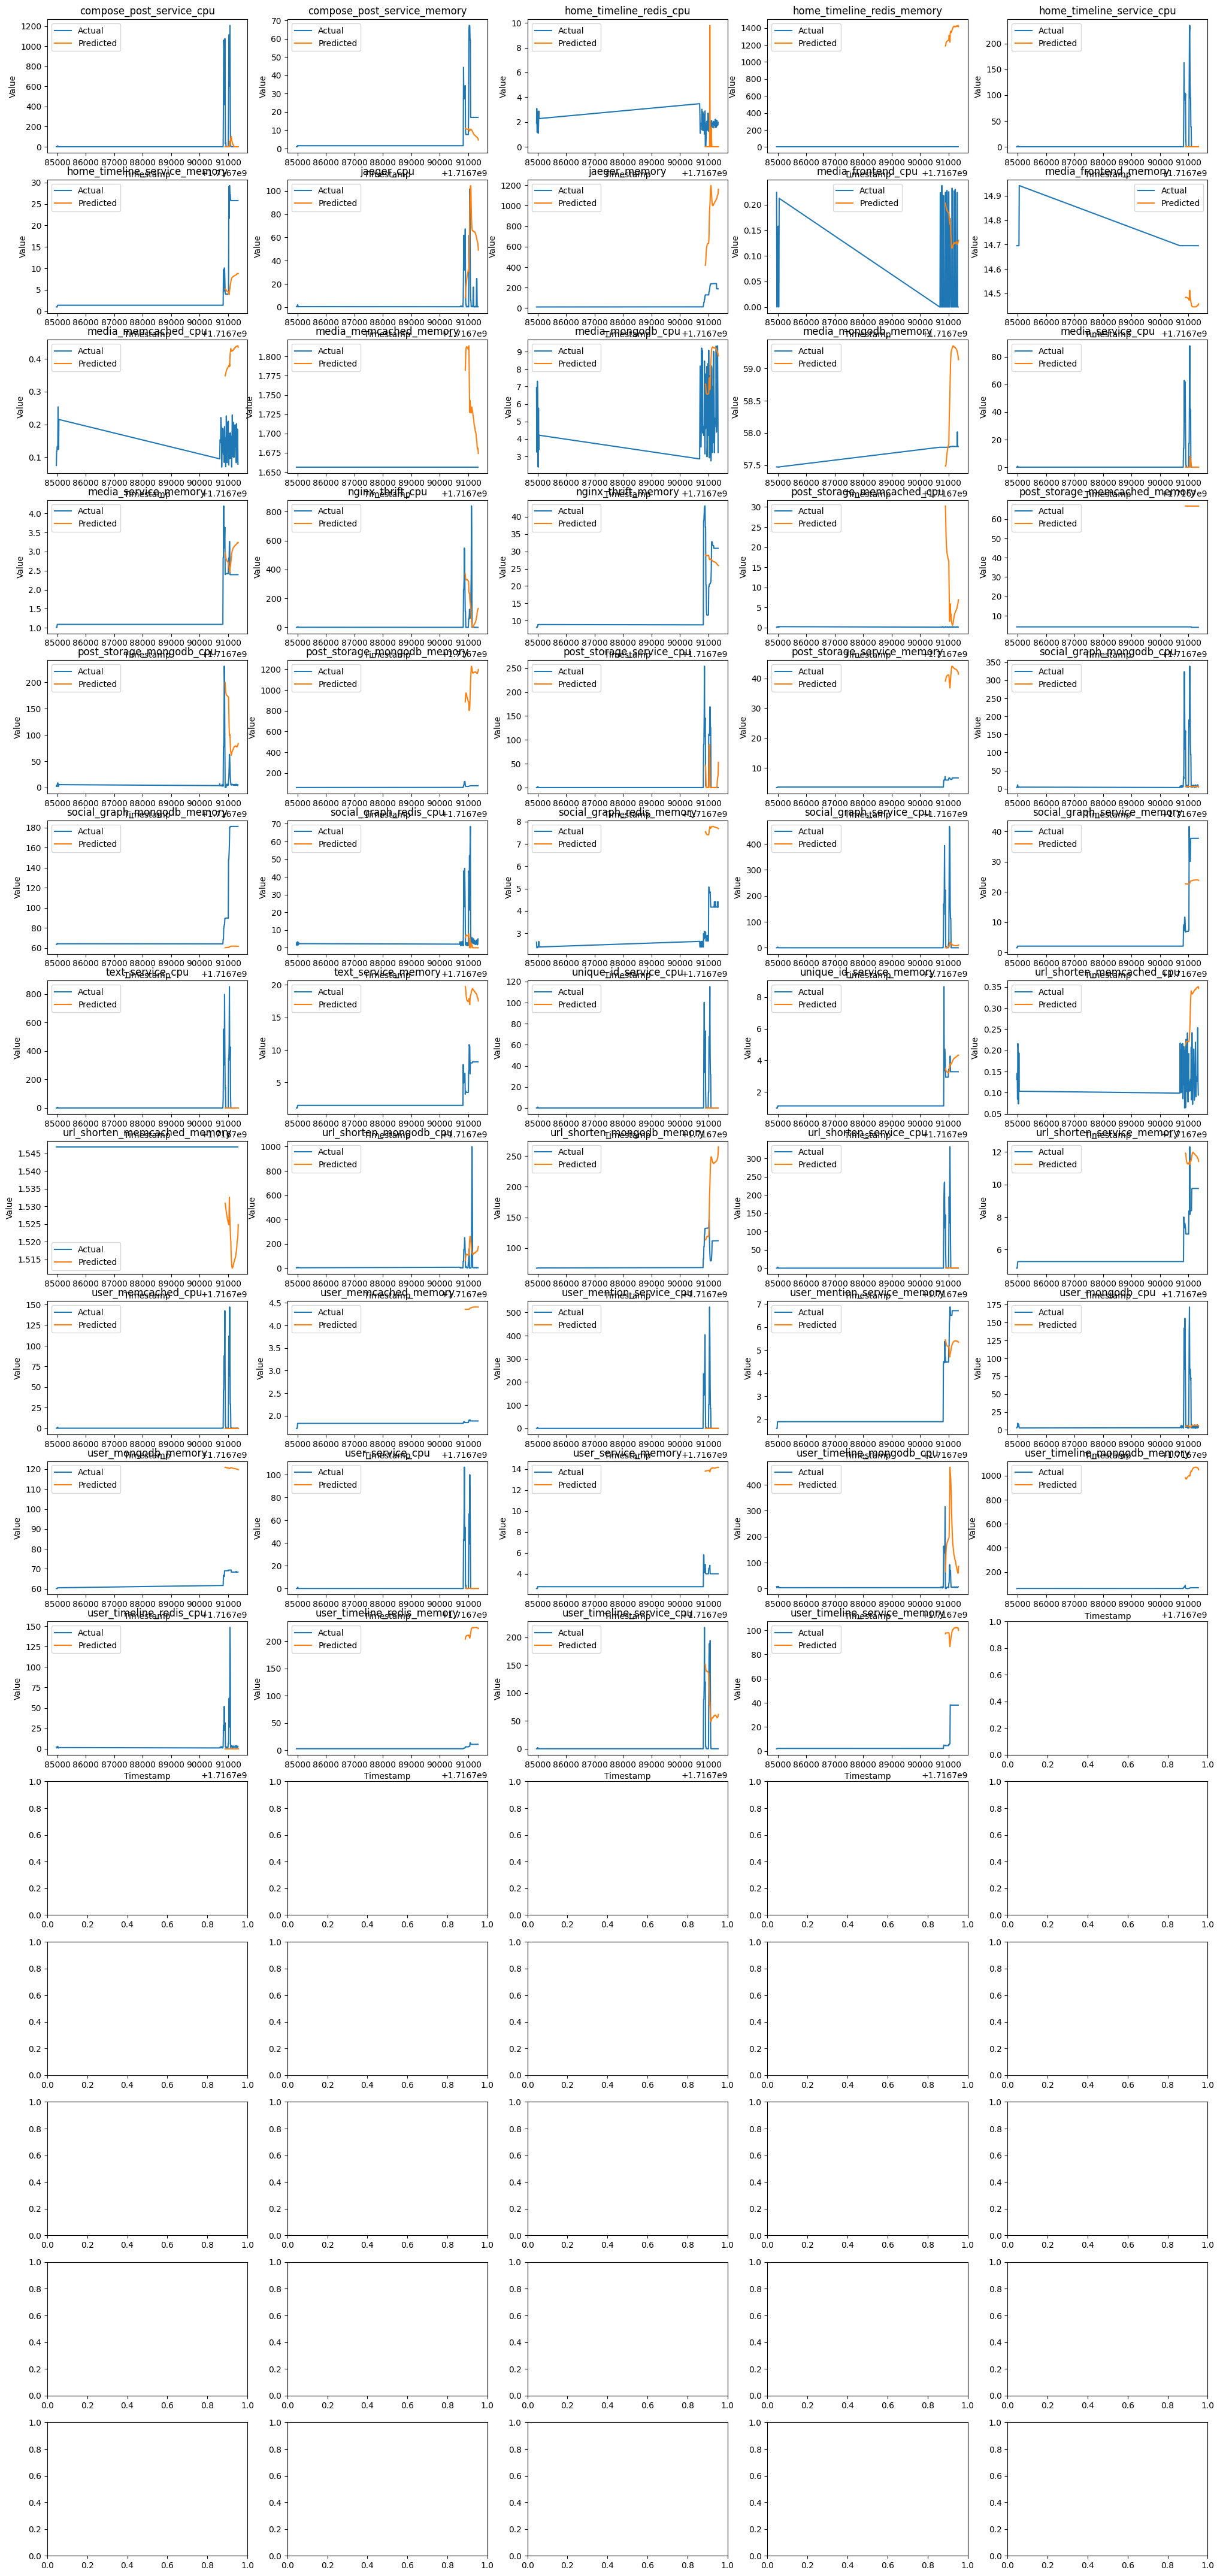

In [8]:
# Plot the data using line plot
import matplotlib.pyplot as plt
# Create 5x5 grid of subplots
fig, axes = plt.subplots(16, 5, figsize=(25, 55))
# Flatten the axes array
axes = axes.flatten()
# Plot each metric
for i, metric in enumerate(df.columns[1:][:-1]):
    axes[i].plot(df['timestamp'], df[metric], label='Actual')
    axes[i].plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')
    axes[i].legend()

In [9]:
table = "social_network_replicas"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
replicas = cur.fetchall()
replicas_column_names = [desc[0] for desc in cur.description]
cur.close()

In [10]:
# Create a dataframe
replica_df = pd.DataFrame(replicas, columns=replicas_column_names)
replica_df

,id,compose_post_service,home_timeline_redis,home_timeline_service,jaeger,media_frontend,media_memcached,media_mongodb,media_service,nginx_thrift,...,url_shorten_mongodb,url_shorten_service,user_memcached,user_mention_service,user_mongodb,user_service,user_timeline_mongodb,user_timeline_redis,user_timeline_service,timestamp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784941
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784951
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784961
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784971
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791303
76,77,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791313
77,78,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791323
78,79,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791333


In [11]:
i = 2
replica_df[replicas_column_names[i]]

0     1
1     1
2     1
3     1
4     1
     ..
75    5
76    5
77    5
78    5
79    5
Name: home_timeline_redis, Length: 80, dtype: int64

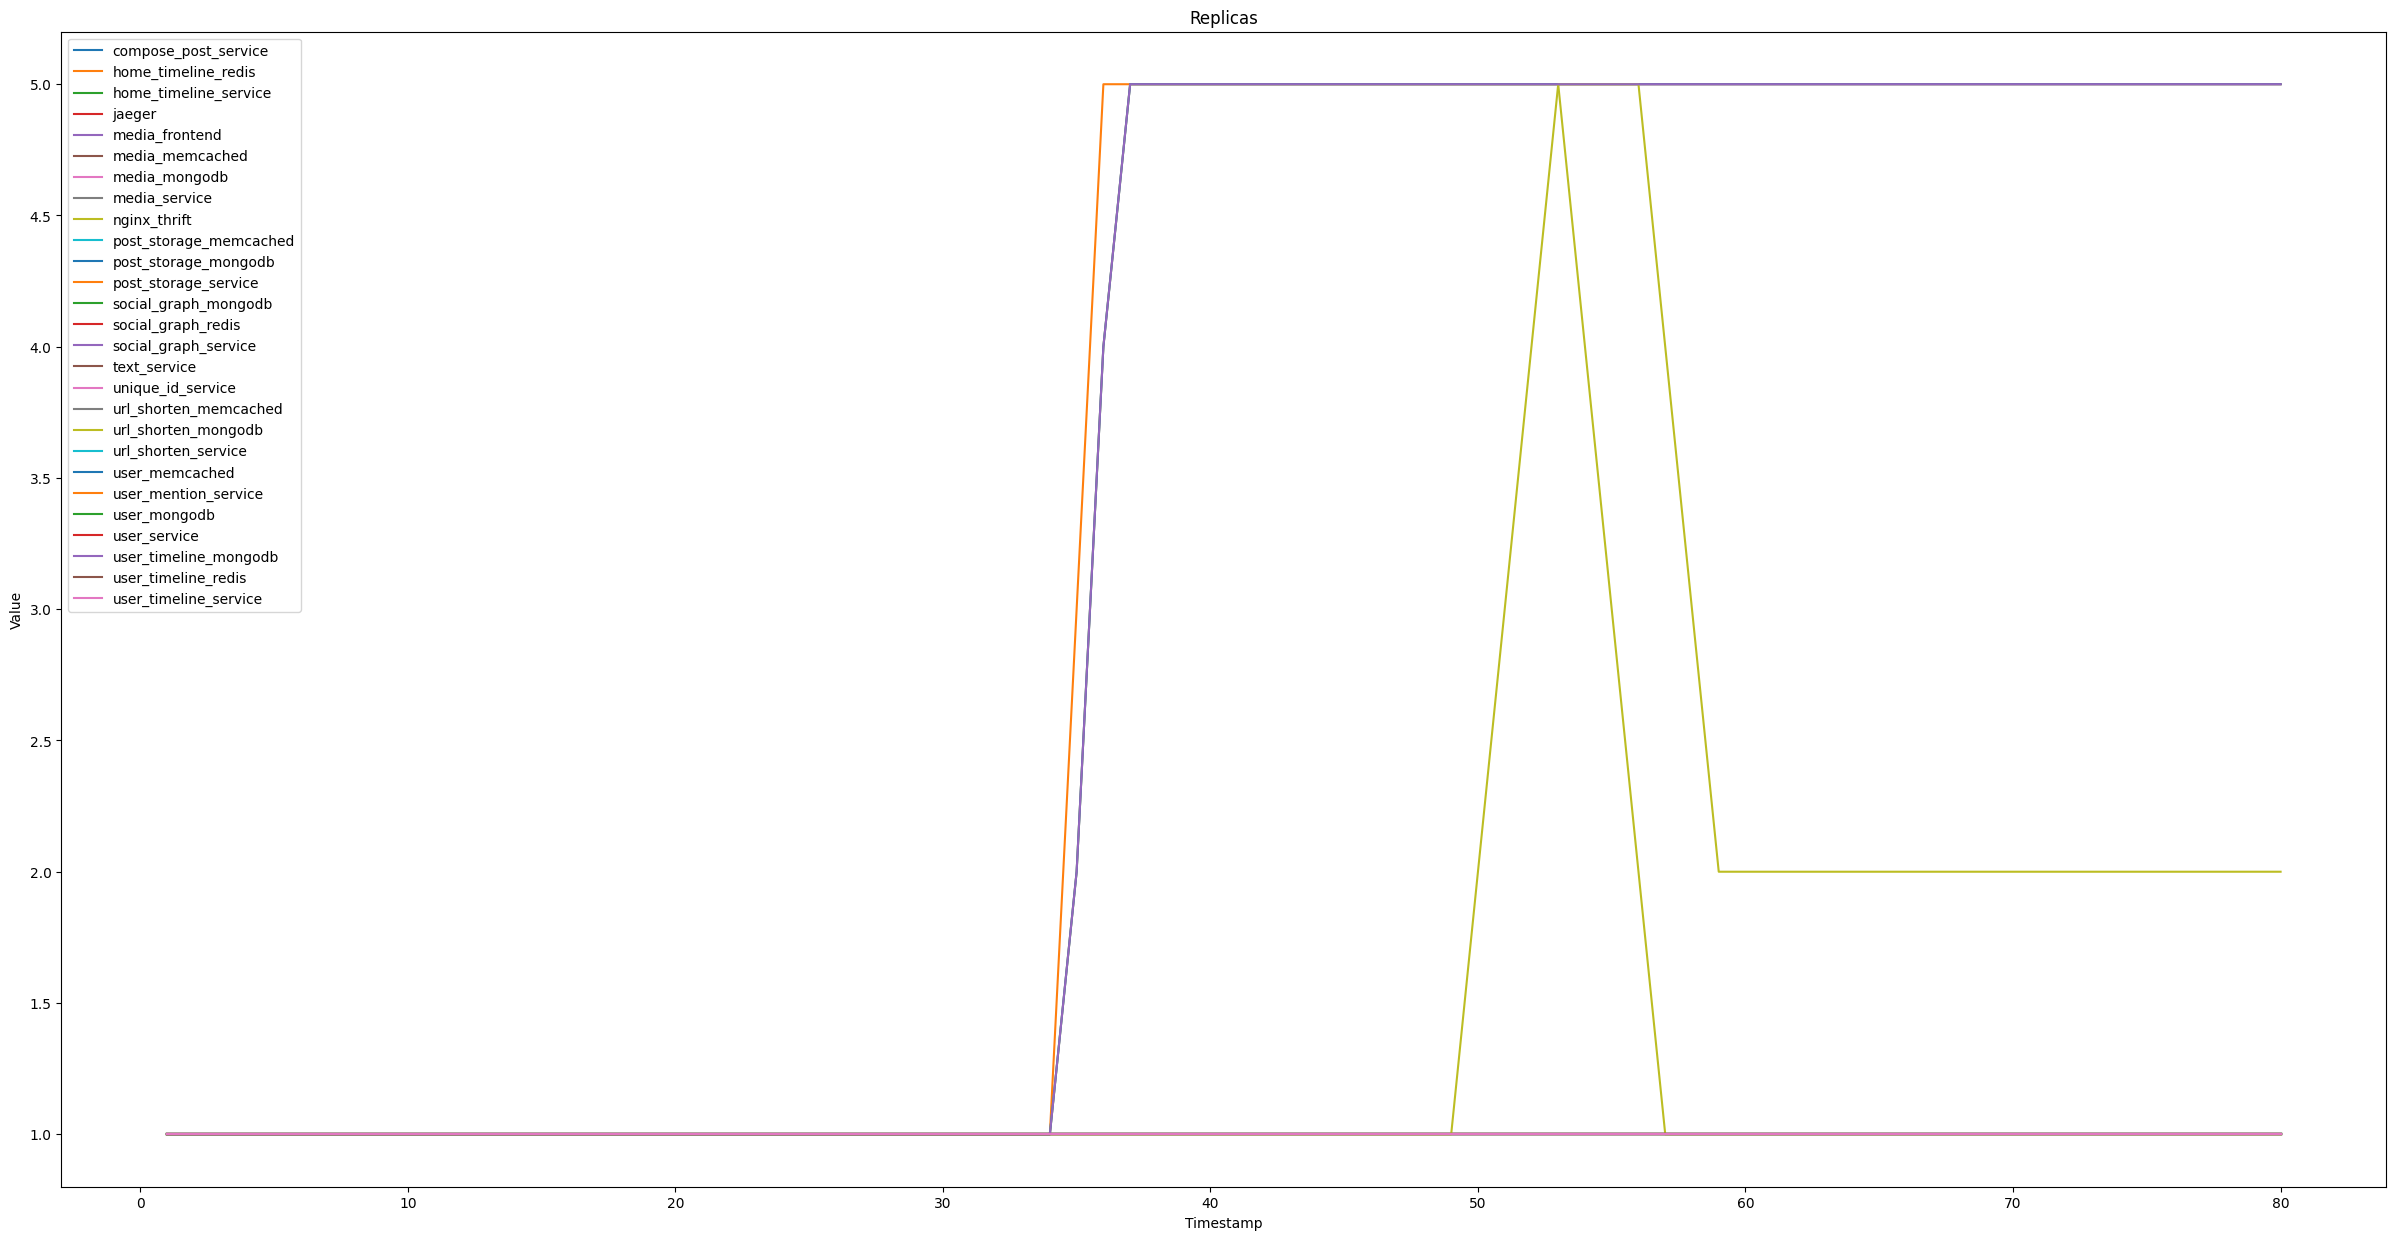

In [12]:
# Plot the data using line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
for replicas_column_name in replicas_column_names[1:]:
    if replicas_column_name == "timestamp":
        continue
    plt.plot(replica_df["id"], replica_df[replicas_column_name], label=replicas_column_name)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Replicas')
plt.legend()
plt.show()
